<a href="https://colab.research.google.com/github/HOSilvL/DL_Project_Study_2021/blob/main/CH5_LSTM%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#qunadl module 다운




In [ ]:
!pip install quandl
!pip uninstall tensorflow 
!pip  install tensorflow==1.13.1 # 1.13.1 버전 Tensorflow 설치
#이후에 꼭 런타임 재실행 해줘야 tensorflow 버전 다운 됨 

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 92.6 MB 62 kB/s 
     |████████████████████████████████| 3.2 MB 34.4 MB/s 
     |████████████████████████████████| 367 kB 45.6 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0


#함수 정의(tools)

In [ ]:
#tools 
import os
import pickle
import quandl
import numpy as np


def date_obj_to_str(date_obj):
    return date_obj.strftime('%Y-%m-%d')


def save_pickle(something, path):
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    with open(path, 'wb') as fh:
        pickle.dump(something, fh, pickle.DEFAULT_PROTOCOL)


def load_pickle(path):
    with open(path, 'rb') as fh:
        return pickle.load(fh)


def fetch_stock_price(symbol,
                      from_date,
                      to_date,
                      cache_path="./tmp/prices/"):
    assert(from_date <= to_date)

    filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
    price_filepath = os.path.join(cache_path, filename)

    try:
        prices = load_pickle(price_filepath)
        print("loaded from", price_filepath)

    except IOError:
        historic = quandl.get("WIKI/" + symbol,
                              start_date=date_obj_to_str(from_date),
                              end_date=date_obj_to_str(to_date))

        prices = historic["Adj. Close"].tolist()
        save_pickle(prices, price_filepath)
        print("saved into", price_filepath)

    return prices


def fetch_cosine_values(seq_len, frequency=0.01, noise=0.1):
    np.random.seed(101)
    x = np.arange(0.0, seq_len, 1.0)
    return np.cos(2 * np.pi * frequency * x) + np.random.uniform(low=-noise, high=noise, size=seq_len)


def format_dataset(values, temporal_features):
    feat_splits = [values[i:i + temporal_features] for i in range(len(values) - temporal_features)]
    feats = np.vstack(feat_splits)
    labels = np.array(values[temporal_features:])
    return feats, labels


def matrix_to_array(m):
    return np.asarray(m).reshape(-1)


# if __name__ == "__main__":
#     print(fetch_cosine_values(10, frequency=0.1))
#     import datetime
#     print(fetch_stock_price("GOOG",
#                             datetime.date(2017, 1, 1),
#                             datetime.date(2017, 1, 31)))

# evluate_ts 함수 정의

In [ ]:
#evaluate_ts 함수 
import numpy as np
from matplotlib import pylab as plt

def evaluate_ts(features, y_true, y_pred):
    print("Evaluation of the predictions:")
    print("MSE:", np.mean(np.square(y_true - y_pred)))
    print("mae:", np.mean(np.abs(y_true - y_pred)))

    print("Benchmark: if prediction == last feature")
    print("MSE:", np.mean(np.square(features[:, -1] - y_true)))
    print("mae:", np.mean(np.abs(features[:, -1] - y_true)))


    plt.plot(matrix_to_array(y_true), 'b')
    plt.plot(matrix_to_array(y_pred), 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

    error = np.abs(matrix_to_array(y_pred) - matrix_to_array(y_true))
    plt.plot(error, 'r')
    fit = np.polyfit(range(len(error)), error, deg=1)
    plt.plot(fit[0] * range(len(error)) + fit[1], '--')
    plt.xlabel("Days")
    plt.ylabel("Prediction error L1 norm")
    plt.title("Prediction error (absolute) and trendline")
    plt.show()

# 1_visualization_data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


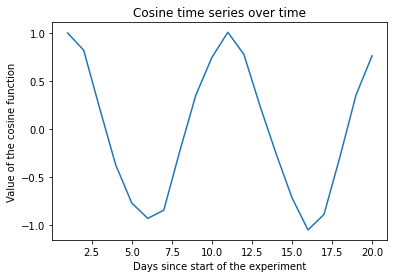

minibatch_cos_X.shape= (15, 5)
minibatch_cos_y.shape= (15,)
Observation 0: X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1: X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504405
Observation 2: X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3: X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4: X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


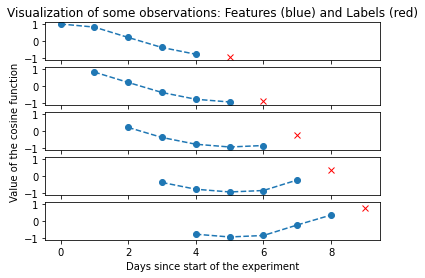

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/KO_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GE_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


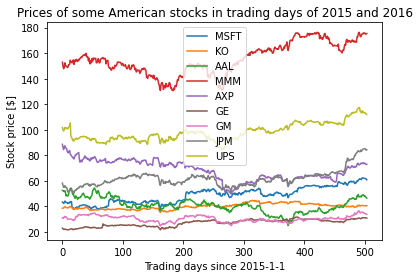

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import seaborn


np.set_printoptions(precision=2)

# # Print 2 oscillations (20 points, with a frequency of 0.1, i.e. a period of 10)
cos_values = fetch_cosine_values(20, frequency=0.1)
day = list(range(1,21))
seaborn.lineplot(day,cos_values) #원래 책에 있던 pyplot이 사라져 lineplot을 사용해야하는데 x축 데이터 값도 넣어줘야해서 날짜를 day 변수로 만들어 넣어줌
plt.xlabel("Days since start of the experiment")
plt.ylabel("Value of the cosine function")
plt.title("Cosine time series over time")
plt.show()

# Format the feature and label set
features_size = 5
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, features_size)
print("minibatch_cos_X.shape=", minibatch_cos_X.shape)
print("minibatch_cos_y.shape=", minibatch_cos_y.shape)

# Print some features of the experiment
samples_to_plot = 5
f, axarr = plt.subplots(samples_to_plot, sharex=True)
for i in range(samples_to_plot):
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]

    print("Observation {}: X={} y={}".format(
        i, feats, label
    ))
    # plt.subplot(samples_to_plot, 1, i+1)
    axarr[i].plot(range(i, features_size + i), feats, '--o')
    axarr[i].plot([features_size + i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])

plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

# Print the stock price of 2015 and 2016 for some stocks
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1,1,1)
for sym in symbols:
    prices = fetch_stock_price(
        sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label=sym)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

# 2_regression_cosine

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.
Training iteration 0 MSE 4.394244
Training iteration 1 MSE 1.3426101
Training iteration 2 MSE 1.2859138
Training iteration 3 MSE 1.842526
Training iteration 4 MSE 1.6616914
Training iteration 5 MSE 0.9931676
Training iteration 6 MSE 0.39235505
Training iteration 7 MSE 0.1808808
Training iteration 8 MSE 0.32896873
Training iteration 9 MSE 0.5551951
Training iteration 10 MSE 0.60370296
Training iteration 11 MSE 0.44349524
Training iteration 12 MSE 0.22051534
Training iteration 13 MSE 0.10052771
Training iteration 14 MSE 0.14700666
Training iteration 15 MSE 0.29074192
Training iteration 16 MSE 0.40164787
Training iteration 17 MSE 0.39934188
Training iteration 18 MSE 0.30271065
Training iteration 19 MSE 0.1933159
Training iteration 20 MSE 0.14344187
Training iteration 21 MSE 0.16518213
Training iteration 22 MSE 0.21137287
Training iteration 23 MSE 0.22246566
Training iteration 24 MSE 0.17670819
Training iteration 25 MS

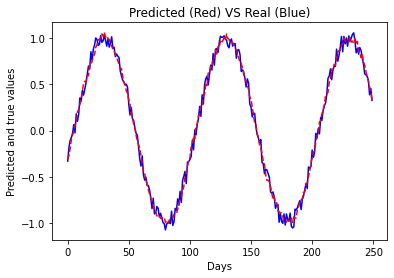

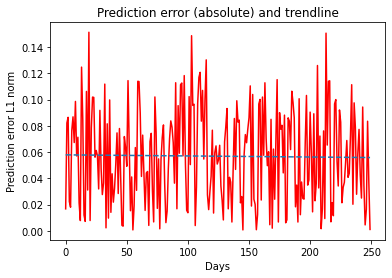

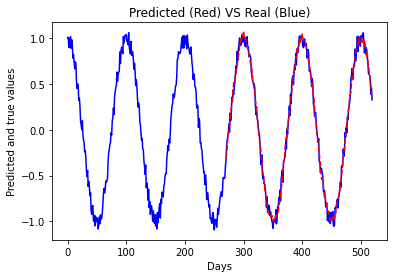

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


tf.reset_default_graph()
tf.set_random_seed(101)

# Settings for the dataset creation
feat_dimension = 20
train_size = 250
test_size = 250

# Settings for tensorflow
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer
n_epochs = 10

if True:  # best values
    learning_rate = 0.1
    n_epochs = 1000

# Fetch the values, and prepare the train/test split
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)


# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, feat_dimension), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a simple linear regressor
def regression_ANN(x, weights, biases):
    return tf.add(biases, tf.matmul(x, weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean=0.0, stddev=1.0), name="weights")
biases = tf.Variable(tf.zeros([1, 1]), name="bias")


# Model, cost and optimizer
y_pred = regression_ANN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X, y_tf: train_y})
        print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values)-test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

# 3_regression_stock_price

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Training iteration 15007 MSE 0.43579274
Training iteration 15008 MSE 0.43879268
Training iteration 15009 MSE 0.4513755
Training iteration 15010 MSE 0.45653668
Training iteration 15011 MSE 0.44879648
Training iteration 15012 MSE 0.43783653
Training iteration 15013 MSE 0.43503803
Training iteration 15014 MSE 0.440913
Training iteration 15015 MSE 0.44671747
Training iteration 15016 MSE 0.4455607
Training iteration 15017 MSE 0.4393108
Training iteration 15018 MSE 0.43488237
Training iteration 15019 MSE 0.4359999
Training iteration 15020 MSE 0.4399524
Training iteration 15021 MSE 0.44167647
Training iteration 15022 MSE 0.43942878
Training iteration 15023 MSE 0.435899
Training iteration 15024 MSE 0.43458614
Training iteration 15025 MSE 0.43610308
Training iteration 15026 MSE 0.43812189
Training iteration 15027 MSE 0.4382928
Training iteration 15028 MSE 0.43658486
Training iteration 15029 MSE 0.43484488
Training iteration 15030 MSE 0.43460903
Training itera

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


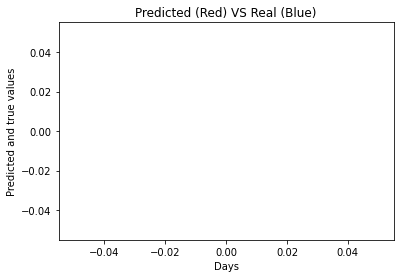

TypeError: ignored

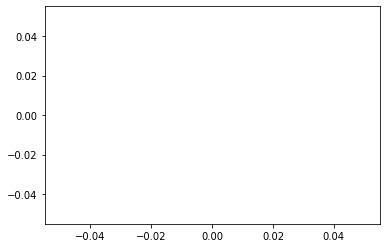

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


tf.reset_default_graph()
tf.set_random_seed(101)

# Settings for the dataset creation
symbol = "MSFT"
feat_dimension = 20
train_size = 250 
test_size = 250 - feat_dimension

# Settings for tensorflow
learning_rate = 0.05
optimizer = tf.train.AdamOptimizer
n_epochs = 1000

if True:  # prod values
    learning_rate = 0.5
    n_epochs = 20000


# Fetch the values, and prepare the train/test split
stock_values = fetch_stock_price(symbol, datetime.date(2015, 7, 1), datetime.date(2015, 8, 31))
minibatch_cos_X, minibatch_cos_y = format_dataset(stock_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)


# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, feat_dimension), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a simple linear regressor
def regression_ANN(x, weights, biases):
    return tf.add(biases, tf.matmul(x, weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean=0.0, stddev=1.0), name="weights")
biases = tf.Variable(tf.zeros([1, 1]), name="bias")


# Model, cost and optimizer
y_pred = regression_ANN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)


with tf.Session() 
as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X, y_tf: train_y})
        print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

# 4_rnn_cosine

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Training iteration 0 MSE 0.7035662
Training iteration 100 MSE 0.0054282933
Training iteration 200 MSE 0.00515249
Training iteration 300 MSE 0.005054179
Training iteration 400 MSE 0.0049638124
Training iteration 500 MSE 0.004875982
Training iteration 600 MSE 0.0047886516
Training iteration 700 MSE 0.0047012316
Training iteration 800 MSE 0.0046501523
Training iteration 900 MSE 0.004559636
Training iteration 1000 MSE 0.004521462
Training iteration 1100 MSE 0.0049723405
Training iteration 1200 MSE 0.0044637905
Training iteration 1300 MSE 0.004390978
Training iteration 1400 MSE 0.004442679
Training iteration 1500 MSE 0.004445942
Training iteration 1600 MSE 0.004382128
Training iteration 1700 MSE 0.004333976
Training iteration 1800 MSE 0.0043011196
Training 

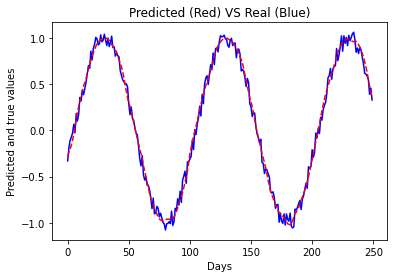

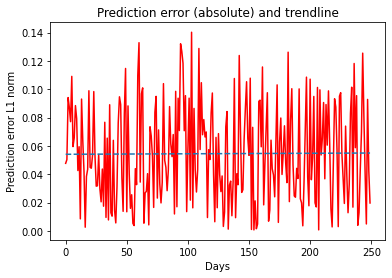

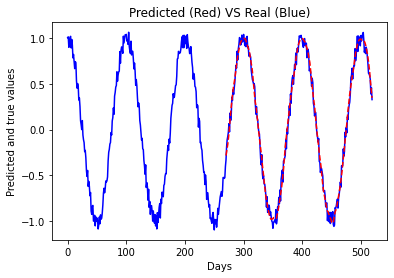

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn

tf.reset_default_graph()
tf.set_random_seed(101)

# Settings for the dataset creation
time_dimension = 20
train_size = 250
test_size = 250

# Settings for tensorflow
learning_rate = 0.01
optimizer = tf.train.AdagradOptimizer
n_epochs = 100
n_embeddings = 64

if True:  # prod values
    learning_rate = 0.5
    n_epochs = 10000
    n_embeddings = time_dimension # as time dimension

# Fetch the values, and prepare the train/test split
cos_values = fetch_cosine_values(train_size + test_size + time_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, time_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

train_X_ts = train_X[:, :, np.newaxis]
test_X_ts = test_X[:, :, np.newaxis]

# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, time_dimension, 1), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a LSTM
def RNN(x, weights, biases):
    x_ = tf.unstack(x, time_dimension, 1)
    lstm_cell = rnn.BasicLSTMCell(n_embeddings)
    outputs, _ = rnn.static_rnn(lstm_cell, x_, dtype=tf.float32)
    return tf.add(biases, tf.matmul(outputs[-1], weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([n_embeddings, 1], mean=0.0, stddev=1.0), name="weights")
biases = tf.Variable(tf.zeros([1]), name="bias")

# Model, cost and optimizer
y_pred = RNN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X_ts, y_tf: train_y})
        if i%100 == 0:
            print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X_ts, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values)-test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

# 5_rnn_stock_price

loaded from ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
Training iteration 0 MSE 1137.4746
Training iteration 100 MSE 19.95156
Training iteration 200 MSE 12.165487
Training iteration 300 MSE 6.382378
Training iteration 400 MSE 4.2503724
Training iteration 500 MSE 3.210868
Training iteration 600 MSE 2.5820827
Training iteration 700 MSE 1.8105891
Training iteration 800 MSE 1.3552166
Training iteration 900 MSE 1.1300428
Test dataset: 18.929213
Evaluation of the predictions:
MSE: 18.929214
mae: 3.2947135
Benchmark: if prediction == last feature
MSE: 33.07875
mae: 4.6483893


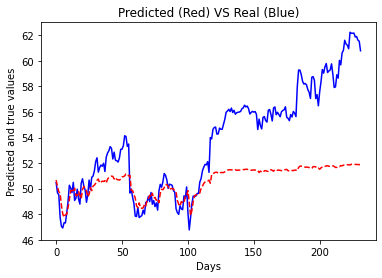

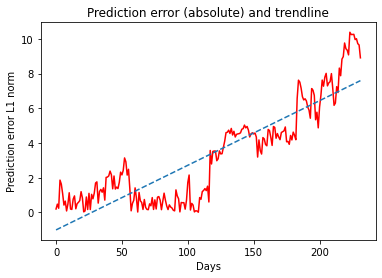

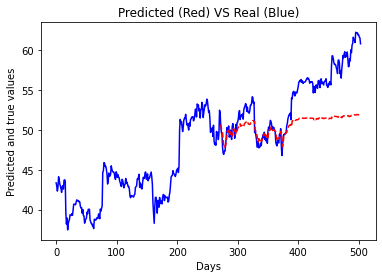

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn

tf.reset_default_graph()
tf.set_random_seed(101)
np.random.seed(101)

# Settings for the dataset creation
symbol = "MSFT"
time_dimension = 20
train_size = 252
test_size = 252 - time_dimension

# Settings for tensorflow
learning_rate = 0.001
optimizer = tf.train.AdagradOptimizer
n_epochs = 100
n_embeddings = 128

if True:  # prod values
    learning_rate = 0.1
    n_epochs = 1000
    n_embeddings = 256

# Fetch the values, and prepare the train/test split
stock_values = fetch_stock_price(symbol, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
minibatch_cos_X, minibatch_cos_y = format_dataset(stock_values, time_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

train_X_ts = train_X[:, :, np.newaxis]
test_X_ts = test_X[:, :, np.newaxis]

# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, time_dimension, 1), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a LSTM
def RNN(x, weights, biases):
    x_ = tf.unstack(x, time_dimension, 1)
    lstm_cell = rnn.BasicLSTMCell(n_embeddings)
    outputs, _ = rnn.static_rnn(lstm_cell, x_, dtype=tf.float32)
    return tf.add(biases, tf.matmul(outputs[-1], weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([n_embeddings, 1], mean=0.0, stddev=10.0), name="weights")
biases = tf.Variable(tf.zeros([1]), name="bias")


# Model, cost and optimizer
y_pred = RNN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X_ts, y_tf: train_y})
        if i%100 == 0:
            print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X_ts, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

# 6_rnn_stock_price_tensorboard

In [ ]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn


tf.reset_default_graph()
tf.set_random_seed(101)
np.random.seed(101)

# Settings for the dataset creation
symbol = "MSFT"
time_dimension = 20
train_size = 252
test_size = 252 - time_dimension

# Settings for tensorflow
tf_logdir = "./logs/tf/stock_price_lstm"
os.makedirs(tf_logdir, exist_ok=1)
learning_rate = 0.001
optimizer = tf.train.AdagradOptimizer
n_epochs = 100
n_embeddings = 128

if True:  # prod values
    learning_rate = 0.1
    n_epochs = 5000
    n_embeddings = 256

# Fetch the values, and prepare the train/test split
stock_values = fetch_stock_price(symbol, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
minibatch_cos_X, minibatch_cos_y = format_dataset(stock_values, time_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

train_X_ts = train_X[:, :, np.newaxis]
test_X_ts = test_X[:, :, np.newaxis]

# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, time_dimension, 1), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a LSTM
def RNN(x, weights, biases):
    with tf.name_scope("LSTM"):
        x_ = tf.unstack(x, time_dimension, 1)
        lstm_cell = rnn.BasicLSTMCell(n_embeddings)
        outputs, _ = rnn.static_rnn(lstm_cell, x_, dtype=tf.float32)
        return tf.add(biases, tf.matmul(outputs[-1], weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([n_embeddings, 1], mean=0.0, stddev=10.0), name="weights")
biases = tf.Variable(tf.zeros([1]), name="bias")

# Model, cost and optimizer
y_pred = RNN(X_tf, weights, biases)
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.square(y_tf - y_pred))
    train_op = optimizer(learning_rate).minimize(cost)
    tf.summary.scalar("MSE", cost)

with tf.name_scope("mae"):
    mae_cost = tf.reduce_mean(tf.abs(y_tf - y_pred))
    tf.summary.scalar("mae", mae_cost)

with tf.Session() as sess:
    writer = tf.summary.FileWriter(tf_logdir, sess.graph)
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        summary, train_cost, _ = sess.run([merged, cost, train_op], feed_dict={X_tf: train_X_ts, y_tf: train_y})
        writer.add_summary(summary, i)
        if i%100 == 0:
            print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X_ts, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

# Now, launch the tensorboard with the command:
# tensorboard --logdir=./logs/tf/stock_price_lstm
# and open your browser to: http://127.0.0.1:6006

loaded from ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk


KeyboardInterrupt: ignored

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn

tf.reset_default_graph()
tf.set_random_seed(101)
np.random.seed(101)

# Settings for the dataset creation
symbol = "MSFT"
time_dimension = 20
train_size = 252
test_size = 252 - time_dimension

# Settings for tensorflow
learning_rate = 0.001
optimizer = tf.train.AdagradOptimizer
n_epochs = 100
n_embeddings = 128

if True:  # prod values
    learning_rate = 0.1
    n_epochs = 1000
    n_embeddings = 256

# Fetch the values, and prepare the train/test split
stock_values = fetch_stock_price(symbol, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
minibatch_cos_X, minibatch_cos_y = format_dataset(stock_values, time_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

train_X_ts = train_X[:, :, np.newaxis]
test_X_ts = test_X[:, :, np.newaxis]

# Here, the tensorflow code
X_tf = tf.placeholder("float", shape=(None, time_dimension, 1), name="X")
y_tf = tf.placeholder("float", shape=(None, 1), name="y")


# Here the model: a LSTM
def RNN(x, weights, biases):
    x_ = tf.unstack(x, time_dimension, 1)
    gru_cell = rnn.GRUCell(n_embeddings)
    outputs, _ = rnn.static_rnn(gru_cell, x_, dtype=tf.float32)
    return tf.add(biases, tf.matmul(outputs[-1], weights))


# Store layers weight & bias
weights = tf.Variable(tf.truncated_normal([n_embeddings, 1], mean=0.0, stddev=10.0), name="weights")
biases = tf.Variable(tf.zeros([1]), name="bias")


# Model, cost and optimizer
y_pred = RNN(X_tf, weights, biases)
cost = tf.reduce_mean(tf.square(y_tf - y_pred))
train_op = optimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # For each epoch, the whole training set is feeded into the tensorflow graph
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op], feed_dict={X_tf: train_X_ts, y_tf: train_y})
        if i%100 == 0:
            print("Training iteration", i, "MSE", train_cost)

    # After the training, let's check the performance on the test set
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf: test_X_ts, y_tf: test_y})
    print("Test dataset:", test_cost)

    # Evaluate the results
    evaluate_ts(test_X, test_y, y_pr)

    # How does the predicted look like?
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

loaded from ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
Training iteration 0 MSE 8648.452
Training iteration 100 MSE 4242.737
Training iteration 200 MSE 120.84388


KeyboardInterrupt: ignored